In [1]:
# read High Spectra Resolution Lidar (HSRL) data using ACT

In [1]:
#%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

In [2]:
# Set your username and token here!
username = 'ARM username'
token = 'token here'

# Set the datastream and start/enddates

datastream = 'guchsrlM1.a1'
startdate = '2023-03-18'
enddate = '2023-03-18'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result.sort()

ds = act.io.read_arm_netcdf(result)
ds
ds.clean.cleanup()

[DOWNLOADING] guchsrlM1.a1.20230318.000000.nc

If you use these data to prepare a publication, please cite:

Holz, R., Garcia, J., Schuman, E., Bambha, R., Ermold, B., Eloranta, E., &
Garcia, J. High Spectral Resolution Lidar (HSRL). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1462207



ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
ds['beta_a_backscatter_log'] = np.log10(ds['beta_a_backscatter'])
ds['beta_a_backscatter_log'].attrs['units'] = f"log10({ds['beta_a_backscatter'].attrs['units']})"
ds = ds.where(ds.range <= 10000, drop=True)

In [19]:
mask = ds['particulate_backscatter_signal_to_noise']>=3
# test_backscatter = ds["beta_a_backscatter_log"].where(mask)
# test_snr = ds["particulate_backscatter_signal_to_noise"].where(mask)
# ds["beta_a_backscatter_log"].plot(x='time')
# test.plot(x='time')
# ds['lidar_ratio']=np.log10(ds['beta_a'])/np.log10(ds['beta_a_backscatter'])
# ds['lidar_ratio'].compute()

/opt/conda/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in log10
  return func(*(_execute_task(a, cache) for a in args))


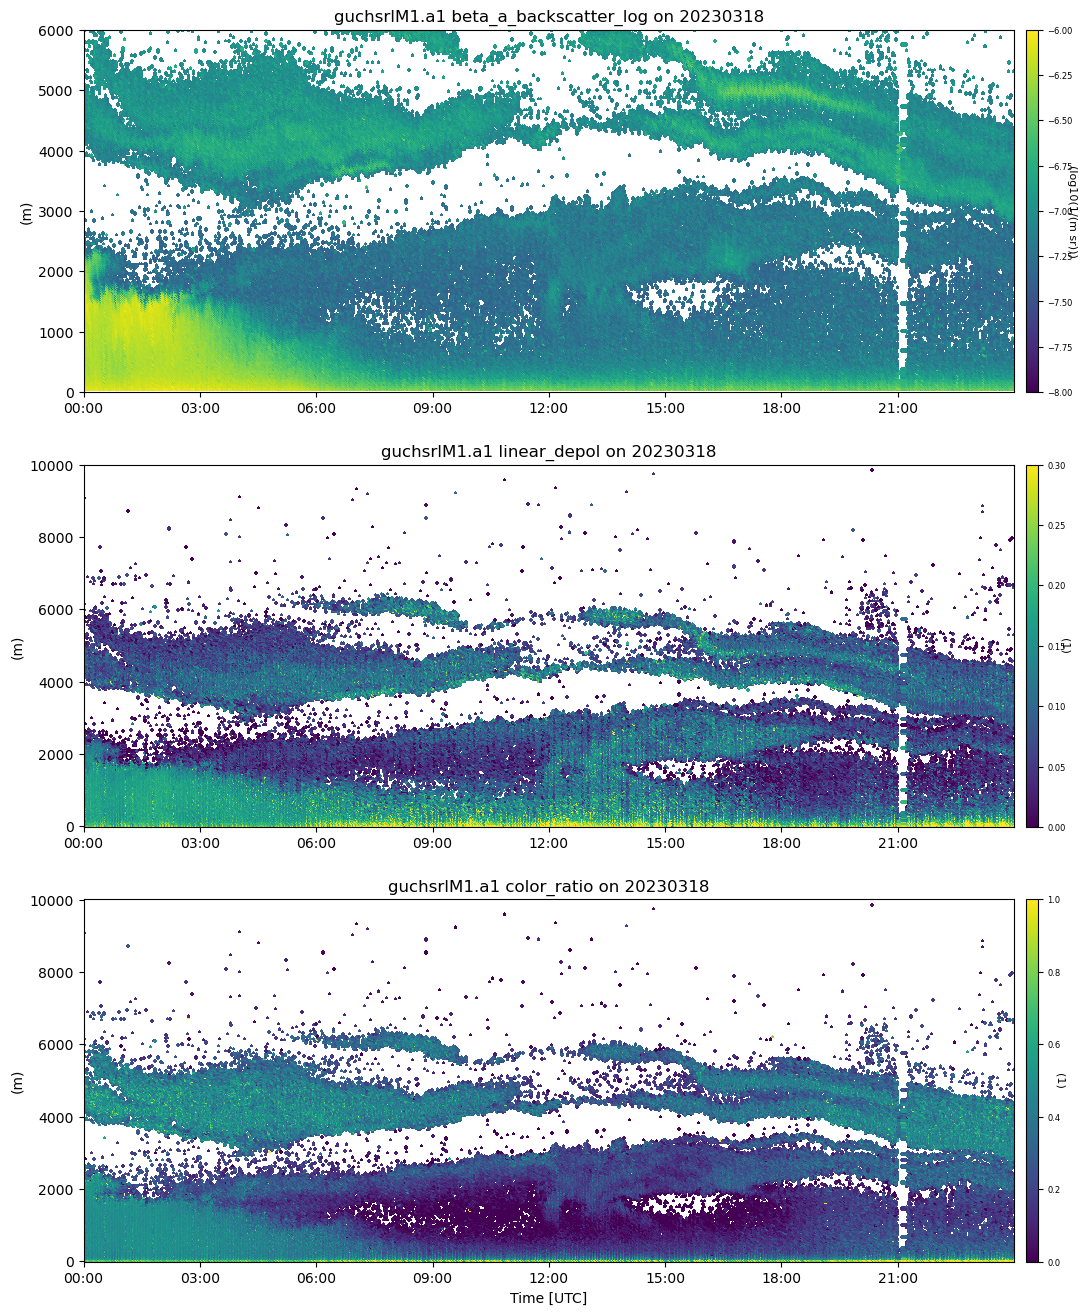

In [18]:
variables = ['beta_a_backscatter_log', 'linear_depol', 'color_ratio','filtered_lidar_ratio']

# watch out cloudy pixels
display = act.plotting.TimeSeriesDisplay(ds.where(mask),
                                         subplot_shape=(3,), figsize=(12,16))
display.plot(variables[0], subplot_index=(0,), vmin = -8, vmax = -6)
display.set_yrng([0, 6000], subplot_index=(0,))

# linear_depol indicates irregular aerosol 
display.plot(variables[1], subplot_index=(1,), vmin = 0, vmax = 0.3)
display.set_yrng([0, 6000], subplot_index=(0,))

# color_ratio an indicator of aerosol particle size. Large aerosol particles have larger color_ratios
display.plot(variables[2], subplot_index=(2,), vmin = 0, vmax = 1)
display.set_yrng([0, 6000], subplot_index=(0,))

# display.plot(variables[3], subplot_index=(3,), vmin = 0, vmax = 1)
# display.set_yrng([0, 6000], subplot_index=(0,))

plt.show()
